In [71]:
import numpy as np
import math
from scipy import stats
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_rel
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectFdr, chi2, f_classif
from sklearn.metrics import accuracy_score
from statsmodels.stats.multicomp import MultiComparison
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import seaborn as sns

# Hypothesis tests

In [2]:
data_h0 = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

In [3]:
h0_mean = np.mean(data_h0)
h0_mean

159.25

In [4]:
h0_std = np.std(data_h0)
h0_std

13.65

In [5]:
data_h1 = data_h0 * 1.03
data_h1

array([129.78 , 133.385, 136.99 , 136.99 , 140.595, 140.595, 144.2  ,
       144.2  , 144.2  , 144.2  , 147.805, 147.805, 147.805, 147.805,
       147.805, 147.805, 151.41 , 151.41 , 151.41 , 151.41 , 151.41 ,
       151.41 , 151.41 , 155.015, 155.015, 155.015, 155.015, 155.015,
       155.015, 155.015, 155.015, 158.62 , 158.62 , 158.62 , 158.62 ,
       158.62 , 158.62 , 158.62 , 158.62 , 158.62 , 162.225, 162.225,
       162.225, 162.225, 162.225, 162.225, 162.225, 162.225, 162.225,
       162.225, 165.83 , 165.83 , 165.83 , 165.83 , 165.83 , 165.83 ,
       165.83 , 165.83 , 165.83 , 165.83 , 169.435, 169.435, 169.435,
       169.435, 169.435, 169.435, 169.435, 169.435, 169.435, 173.04 ,
       173.04 , 173.04 , 173.04 , 173.04 , 173.04 , 173.04 , 173.04 ,
       176.645, 176.645, 176.645, 176.645, 176.645, 176.645, 176.645,
       180.25 , 180.25 , 180.25 , 180.25 , 180.25 , 180.25 , 183.855,
       183.855, 183.855, 183.855, 187.46 , 187.46 , 191.065, 191.065,
       194.67 , 198.

In [6]:
h1_mean = np.mean(data_h1)
h1_mean

164.0275

In [7]:
h1_std = np.std(data_h1)
h1_std

14.0595

In [8]:
alpha = 0.05

## Z hypothesis test

- $ Z = \frac{\overline{X} - \mu_{0}}{\frac{\sigma}{\sqrt{n}}} $

Manual approch

In [9]:
def z_test(h0, h1):
    h0_mean = np.mean(h0)
    h1_mean = np.mean(h1)
    h1_std = np.std(h1)
    h1_n = len(h1)

    z = (h1_mean - h0_mean) / (h1_std / math.sqrt(h1_n))

    return stats.norm.cdf(z)

In [10]:
z_test(data_h0, data_h1)

0.9996606701617486

In [11]:
def hypothesis(p, alpha = 0.05):
    if p < alpha:
        print('Reject null hypothesis (H0)')
        print('Accepting alternative hypothesis (H1)')
    else:
        print('Reject alternative hypothesis (H1)')
        print('Continuing with null hypothesis (H0)')

In [12]:
p = 1 - z_test(data_h0, data_h1)

hypothesis(p, alpha)

Reject null hypothesis (H0)
Accepting alternative hypothesis (H1)


Using statsmodels library

- https://www.statsmodels.org/devel/generated/statsmodels.stats.weightstats.ztest.html

In [13]:
_, p = ztest(data_h0, data_h1, value=h1_mean - h0_mean, alternative='larger')
p = 1 - p

hypothesis(p, alpha)

Reject null hypothesis (H0)
Accepting alternative hypothesis (H1)


## T studant distribution

In [14]:
data_t_h0 = np.array([149. , 160., 147., 189., 175., 168., 156., 160., 152.])
data_t_h0

array([149., 160., 147., 189., 175., 168., 156., 160., 152.])

In [15]:
data_t_h1 = data_t_h0 * 1.03
data_t_h1

array([153.47, 164.8 , 151.41, 194.67, 180.25, 173.04, 160.68, 164.8 ,
       156.56])

In [16]:
_, p = ttest_rel(data_t_h0, data_t_h1)
p

4.072922493930081e-10

In [17]:
alpha = 0.01

hypothesis(p, alpha)

Reject null hypothesis (H0)
Accepting alternative hypothesis (H1)


## Chi-squared test

In [18]:
data_chi = {
    "computer_vision" : [30, 22],
    "search_algorithm" : [20, 28],
}

df_chi = pd.DataFrame (data=data_chi, index=["man", "woman"])
df_chi.head()

,computer_vision,search_algorithm
man,30,20
woman,22,28


In [19]:
data_chi_2 = {
    "computer_vision" : [30, 5],
    "search_algorithm" : [5, 30],
}

df_chi_2 = pd.DataFrame (data=data_chi_2, index=["man", "woman"])
df_chi_2.head()

,computer_vision,search_algorithm
man,30,5
woman,5,30


In [20]:
_, p, _, _ = stats.chi2_contingency(df_chi)
print(p)
hypothesis(p)

0.16117778944980238
Reject alternative hypothesis (H1)
Continuing with null hypothesis (H0)


In [21]:
_, p, _, _ = stats.chi2_contingency(df_chi_2)
print(p)
hypothesis(p)

9.631291707023605e-09
Reject null hypothesis (H0)
Accepting alternative hypothesis (H1)


### Feature selection with hypothesis test - univariate SelectFdr
- Fdr = False positive rate;
- Select the pvalues below alpha based on a FPR test;
- It's used a dependent variable to compara the results. E.i.: using t-test or z-test to compara the means;
- This tecnique uses type 1 error, when the null hypothesis is rejected incorrectly.

In [22]:
df = pd.read_csv('Bases de dados/ad.data')
df.head()

,125,125.1,1.0,1,0,0.1,0.2,0.3,0.4,0.5,...,0.1532,0.1533,0.1534,0.1535,0.1536,0.1537,0.1538,0.1539,0.1540,ad.
0,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [23]:
df.shape

(3278, 1559)

In [24]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X.shape, y.shape

((3278, 1558), (3278,))

In [25]:
np.unique(y, return_counts=True)

(array(['ad.', 'nonad.'], dtype=object), array([ 458, 2820]))

#### Without feature selection

In [26]:
def train(X, y, model=GaussianNB()):
    model.fit(X, y)
    pred = model.predict(X)
    return accuracy_score(y_true=y, y_pred=pred)

In [27]:
train(X, y)

0.7812690665039659

#### Using feature selection

In [28]:
fdr = SelectFdr(chi2, alpha=0.01)
X_new = fdr.fit_transform(X, y)

X_new.shape, X.shape

((3278, 433), (3278, 1558))

In [29]:
fdr.pvalues_

array([1.82126799e-261, 0.00000000e+000, 1.48071225e-150, ...,
       4.89247310e-041, 5.26304043e-012, 9.32064068e-002])

In [30]:
len(fdr.pvalues_)

1558

In [31]:
fdr.get_support()

array([ True,  True,  True, ...,  True,  True, False])

In [32]:
fdr.get_params()

{'alpha': 0.01,
 'score_func': <function sklearn.feature_selection._univariate_selection.chi2(X, y)>}

In [33]:
np.where(fdr.get_support() == True) #getting selected column indexes

(array([   0,    1,    2,    9,   11,   14,   20,   21,   26,   31,   34,
          36,   49,   58,   59,   64,   65,   69,   70,   86,   91,   95,
          96,  102,  104,  106,  113,  133,  134,  139,  155,  158,  163,
         167,  172,  175,  180,  181,  183,  185,  186,  189,  190,  192,
         193,  224,  242,  246,  248,  249,  251,  259,  264,  265,  266,
         267,  268,  269,  270,  274,  276,  278,  287,  290,  293,  304,
         307,  310,  312,  317,  321,  329,  330,  336,  341,  345,  346,
         350,  351,  355,  356,  357,  359,  366,  367,  370,  372,  381,
         386,  388,  389,  398,  405,  418,  420,  426,  427,  429,  430,
         432,  435,  440,  455,  457,  460,  465,  470,  472,  477,  478,
         482,  508,  511,  518,  528,  532,  533,  540,  542,  548,  551,
         556,  572,  573,  574,  576,  586,  622,  625,  627,  638,  643,
         648,  653,  658,  661,  663,  666,  683,  688,  694,  703,  704,
         709,  711,  720,  723,  729, 

In [34]:
np.sum(fdr.pvalues_ <= 0.01)

475

In [35]:
train(X_new,y)

0.9707138499084808

## ANOVA

In [36]:
group_a = np.array([165, 152, 143, 140, 155])
group_b = np.array([130, 169, 164, 143, 154])
group_c = np.array([163, 158, 154, 149, 156])

In [37]:
# number_groups - 1 -> 3 - 1 = 2
dfn = 2

# (number of rows - 1) * number of groups -> (5 - 1) * 3 = 12
dfd = (len(group_a) - 1) * 3

dfn, dfd

(2, 12)

In [38]:
# 0.05 = alpha
stats.f.ppf(1 - 0.05, dfn, dfd)

3.8852938346523933

In [39]:
_, p = stats.f_oneway(group_a, group_b, group_c)
p

0.7613994386091956

In [40]:
hypothesis(p)

Reject alternative hypothesis (H1)
Continuing with null hypothesis (H0)


### Tukey test

In [41]:
data_tukey = {'values': [165, 152, 143, 140, 155, 130, 169, 164, 143, 154, 163, 158, 154, 149, 156],
         'group': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']}

df_tukey = pd.DataFrame(data_tukey)
df_tukey

,values,group
0,165,A
1,152,A
2,143,A
3,140,A
4,155,A
5,130,B
6,169,B
7,164,B
8,143,B
9,154,B


In [42]:
compared_groups = MultiComparison(data=df_tukey['values'], groups=df_tukey['group'])

In [43]:
tukey_test = compared_groups.tukeyhsd()
print(tukey_test)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B      1.0 0.9891 -17.9023 19.9023  False
     A      C      5.0 0.7648 -13.9023 23.9023  False
     B      C      4.0 0.8411 -14.9023 22.9023  False
-----------------------------------------------------


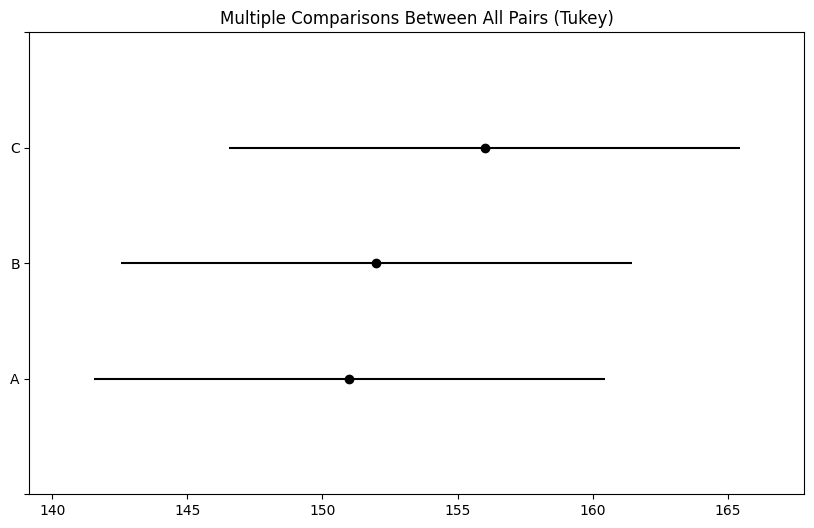

In [44]:
tukey_test.plot_simultaneous();

In [45]:
data_tukey2 = {'values': [70, 90, 80, 50, 20, 130, 169, 164, 143, 154, 163, 158, 154, 149, 156],
         'group': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C']}

df_tukey2 = pd.DataFrame(data_tukey2)
df_tukey2

,values,group
0,70,A
1,90,A
2,80,A
3,50,A
4,20,A
5,130,B
6,169,B
7,164,B
8,143,B
9,154,B


In [46]:
compared_groups2 = MultiComparison(data=df_tukey2['values'], groups=df_tukey2['group'])
tukey_test2 = compared_groups2.tukeyhsd()
print(tukey_test2)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B     90.0    0.0  58.4785 121.5215   True
     A      C     94.0    0.0  62.4785 125.5215   True
     B      C      4.0 0.9391 -27.5215  35.5215  False
------------------------------------------------------


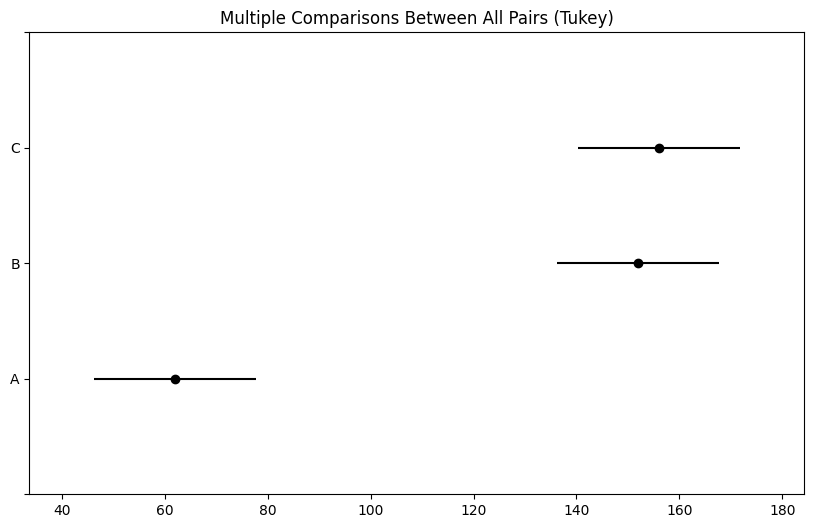

In [47]:
tukey_test2.plot_simultaneous();

### Feature selection with SelectFdr using ANOVA approach

In [48]:
fdr_anova = SelectFdr(f_classif, alpha=0.01)
X_new_anova = fdr_anova.fit_transform(X, y)

X.shape, X_new_anova.shape

((3278, 1558), (3278, 433))

In [49]:
fdr_anova.pvalues_

array([1.70329879e-005, 5.94073696e-201, 4.11884494e-016, ...,
       1.08388800e-042, 3.52133284e-012, 9.30110659e-002])

In [50]:
np.sum(fdr.pvalues_ <= 0.01)

475

In [51]:
train(X_new_anova, y)

0.9707138499084808

## Hypothesis test from machine learning algorithms accuracies

In [52]:
df = pd.read_csv('Bases de dados/credit_data.csv')
df.dropna(inplace=True)
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [53]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

X.shape, y.shape

((1997, 3), (1997,))

In [54]:
min(X[0]), max(X[0])

(59.0170150669292, 66155.9250950813)

In [55]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
min(X[0]), max(X[0])

(1.2019070702053862, 1.4538977547824534)

In [56]:
def train_model(model, X, y, random_state=1):
    kfold = KFold(n_splits=10, shuffle=True, random_state=random_state)

    scores = cross_val_score(estimator=model, X=X, y=y, cv=kfold)

    return scores.mean()

In [59]:
res_nb = []
res_lr = []
res_rf = []

for i in tqdm(range(30)):
    res_nb.append(train_model(model=GaussianNB(), X=X, y=y, random_state=i))
    res_lr.append(train_model(model=LogisticRegression(), X=X, y=y, random_state=i))
    res_rf.append(train_model(model=RandomForestClassifier(), X=X, y=y, random_state=i))

res_nb = np.asarray(res_nb)
res_lr = np.asarray(res_lr)
res_rf = np.asarray(res_rf)

100%|███████████████████████████████████████████| 30/30 [00:34<00:00,  1.16s/it]


In [60]:
res_nb.mean(), res_lr.mean(), res_rf.mean()

(0.9249859296482411, 0.9457008375209381, 0.9867138190954774)

### Shapiro-Wilk test if the distribution is normal

In [61]:
alpha = 0.05 #95% confidence

In [76]:
shapiro = lambda x : print(f'Its a Normal Distribution with p value {stats.shapiro(x)[1]}' if stats.shapiro(x)[1] > alpha else 'Its not a Normal Distribution')

In [77]:
shapiro(res_nb)
shapiro(res_lr)
shapiro(res_rf)

Its a Normal Distribution with p value 0.40516602993011475
Its a Normal Distribution with p value 0.13457602262496948
Its a Normal Distribution with p value 0.45411714911460876


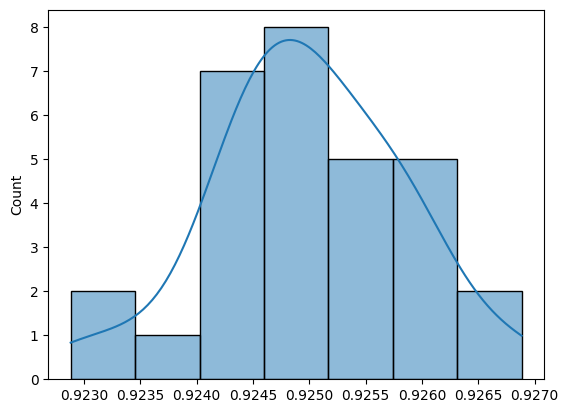

In [73]:
sns.histplot(res_nb, kde=True);

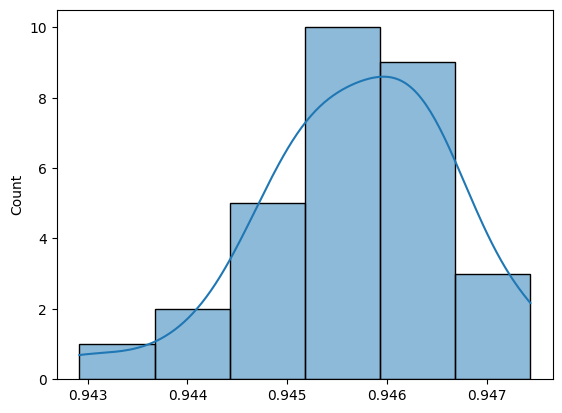

In [74]:
sns.histplot(res_lr, kde=True);

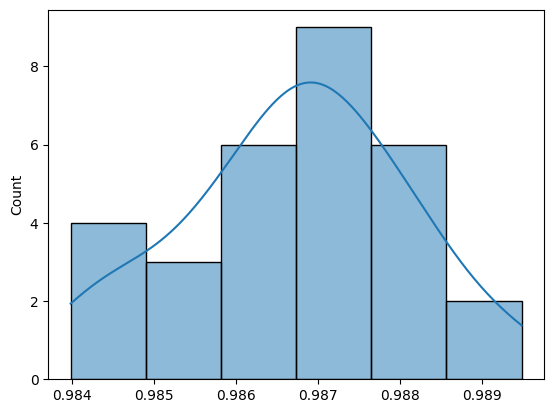

In [75]:
sns.histplot(res_rf, kde=True);

### D'Agostinho K^2 test if the distribution is normal

In [78]:
normal_test = lambda x : print(f'Its a Normal Distribution with p value {stats.normaltest(x)[1]}' if stats.normaltest(x)[1] > alpha else 'Its not a Normal Distribution')

In [79]:
normal_test(res_nb)
normal_test(res_lr)
normal_test(res_rf)

Its a Normal Distribution with p value 0.6573205784978502
Its a Normal Distribution with p value 0.1300771631514313
Its a Normal Distribution with p value 0.8951107181132326


### Anderson-darling test if the distribution is normal

In [83]:
anderson = lambda x : print(f'Its a Normal Distribution with p value {stats.anderson(x).statistic}' if stats.anderson(x).statistic > alpha else 'Its not a Normal Distribution')

In [86]:
anderson(res_nb)
anderson(res_lr)
anderson(res_rf)

Its a Normal Distribution with p value 0.5456346672421084
Its a Normal Distribution with p value 0.6048933015735933
Its a Normal Distribution with p value 0.4512024621199515


### Nonparametric test

- https://www.statisticshowto.com/parametric-and-non-parametric-data/#:~:text=Nonparametric%20tests%20can%20perform%20well,20%20items%20in%20each%20group).

If at all possible, you should us parametric tests, as they tend to be more accurate. Parametric tests have greater statistical power, which means they are likely to find a true significant effect. Use nonparametric tests only if you have to (i.e. you know that assumptions like normality are being violated). Nonparametric tests can perform well with non-normal continuous data if you have a sufficiently large sample size (generally 15-20 items in each group).

- H0 = similar data
- h1 = nonsimilar data

#### Wilcoxon Signed-Rank test

In [87]:
_, p = stats.wilcoxon(res_nb, res_lr)
hypothesis(p)

Reject null hypothesis (H0)
Accepting alternative hypothesis (H1)


In [88]:
_, p = stats.wilcoxon(res_nb, res_rf)
hypothesis(p)

Reject null hypothesis (H0)
Accepting alternative hypothesis (H1)


In [89]:
_, p = stats.wilcoxon(res_lr, res_rf)
hypothesis(p)

Reject null hypothesis (H0)
Accepting alternative hypothesis (H1)


#### Friedman test

In [91]:
stats.friedmanchisquare(res_nb, res_lr, res_rf)
hypothesis(p)

Reject null hypothesis (H0)
Accepting alternative hypothesis (H1)


### ANOVA and Tukey algorithms

In [93]:
_, p = stats.f_oneway(res_nb, res_lr, res_rf)
hypothesis(p)

Reject null hypothesis (H0)
Accepting alternative hypothesis (H1)


In [98]:
res_models = {
    "accuracy" : np.concatenate([res_nb, res_lr, res_rf]),
    "algorithm" : ['naive'] * len(res_nb) + ['logistic'] * len(res_lr) + ['forest'] * len(res_rf)
}

df_models = pd.DataFrame(res_models)
df_models.head()

,accuracy,algorithm
0,0.924862,naive
1,0.924917,naive
2,0.924387,naive
3,0.922882,naive
4,0.924872,naive


In [99]:
df_models.algorithm.value_counts()

algorithm
naive       30
logistic    30
forest      30
Name: count, dtype: int64

In [101]:
compared_models = MultiComparison(data=df_models.accuracy, groups=df_models.algorithm)
tukey_test_models = compared_models.tukeyhsd()
print(tukey_test_models)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower   upper  reject
-------------------------------------------------------
  forest logistic   -0.041   0.0 -0.0417 -0.0403   True
  forest    naive  -0.0617   0.0 -0.0624 -0.0611   True
logistic    naive  -0.0207   0.0 -0.0214   -0.02   True
-------------------------------------------------------


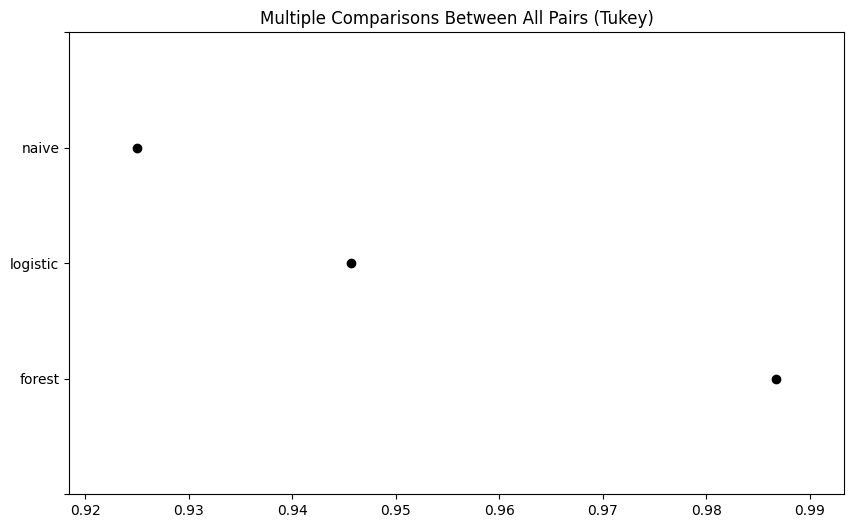

In [103]:
tukey_test_models.plot_simultaneous();

## Nonnormal data

In [105]:
df_nonnormal = pd.read_csv('Bases de dados/trip_d1_d2.csv', sep=';')
df_nonnormal.head()

,D1,D2
0,0.7928,0.7983
1,0.7926,0.7983
2,0.7925,0.7982
3,0.7928,0.7982
4,0.7928,0.7982


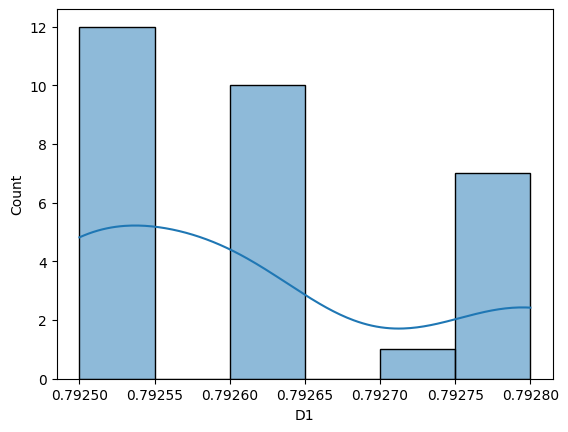

In [108]:
sns.histplot(df_nonnormal['D1'], kde=True);

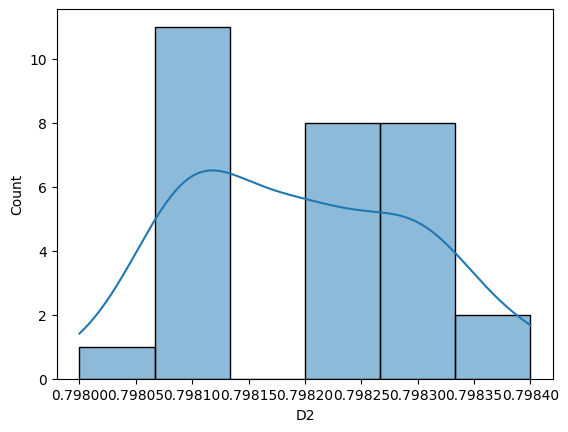

In [109]:
sns.histplot(df_nonnormal['D2'], kde=True);

### Shapiro test
- H0 - normal distribution
- H1 - nonnormal distribution

In [115]:
_, p = stats.shapiro(df_nonnormal['D1'])
hypothesis(p)

Reject null hypothesis (H0)
Accepting alternative hypothesis (H1)


In [116]:
_, p = stats.shapiro(df_nonnormal['D2'])
hypothesis(p)

Reject null hypothesis (H0)
Accepting alternative hypothesis (H1)


### Wilcoxon test
- H0 - similar data
- H1 - nonsimilar data

In [118]:
_, p = stats.wilcoxon(x=df_nonnormal['D1'], y=df_nonnormal['D2'])
hypothesis(p)

Reject null hypothesis (H0)
Accepting alternative hypothesis (H1)


In [122]:
print('D1 is better than D2' if df_nonnormal.D1.mean() > df_nonnormal.D2.mean() else 'D2 is better than D1')

D2 is better than D1
